**Цель работы:**

Изучение связи между признаками двумерного набора данных, визуализация данных.

# Загрузка набора данных

### Описание предметной области

Вариант №10

Набор данных: credit_risk.csv

Атрибуты:
1. возраст
2. доход
3. статус домовладения (Собственный, Ипотека, Аренда)
4. стаж работы в годах
5. цель кредита
6. сумма кредита по заявке
7. процентная ставка
8. статус одобрения кредита
9. сумма кредита в процентах от дохода
10. не допустил ли заявитель ранее дефолта по кредиту (да, нет)
11. длина кредитной истории заявителя

### 1.Чтение файла (набора данных)

In [4]:
# импорт библиотек, чтение файла с помощью pandas
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('credit_risk.csv')

Saving credit_risk.csv to credit_risk (1).csv


### 2. Обзор данных

2.1 Вывод первых 20 строк с помощью метода head.

In [5]:
# применить метод head
print(df.head(20))

    Id   Age  Income      Home  Emp_length             Intent  Amount   Rate  \
0    0  22.0   59000      RENT       123.0           PERSONAL   35000  16.02   
1    1  21.0    9600       OWN         5.0          EDUCATION    1000  11.14   
2    2  25.0    9600  MORTGAGE         1.0            MEDICAL    5500  12.87   
3    3  23.0   65500      RENT         4.0            MEDICAL   35000  15.23   
4    4  24.0   54400      RENT         8.0            MEDICAL   35000  14.27   
5    5  21.0    9900       OWN         2.0            VENTURE    2500   7.14   
6    6  26.0   77100     RENET         8.0          EDUCATION   35000  12.42   
7    7  24.0   78956      RENT         5.0            MEDICAL   35000  11.11   
8    8  24.0   83000      RENT         8.0           PERSONAL   35000   8.90   
9    9  21.0   10000       OWN         6.0            VENTURE    1600  14.74   
10  10  22.0   85000      RENT         6.0            VENTURE   35000  10.37   
11  11  21.0   10000       OWN         2

2.2 Оценка данных с помощью метода info.

In [6]:
# выполнит метод info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              652 non-null    int64  
 1   Age             652 non-null    float64
 2   Income          652 non-null    int64  
 3   Home            652 non-null    object 
 4   Emp_length      643 non-null    float64
 5   Intent          652 non-null    object 
 6   Amount          652 non-null    int64  
 7   Rate            586 non-null    float64
 8   Status          652 non-null    int64  
 9   Percent_income  652 non-null    float64
 10  Default         652 non-null    object 
 11  Cred_length     652 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 61.3+ KB
None


2.3 Оценка данных с помощью метода describe.

In [7]:
# оцените числовые столбцы с помощью describe
print(df.describe())

               Id         Age         Income  Emp_length        Amount  \
count  652.000000  652.000000     652.000000  643.000000    652.000000   
mean   325.495399   24.285276   90008.855828    4.601866  18800.996933   
std    188.352535    7.841061   69530.312525    7.281616   9152.896250   
min      0.000000   21.000000    9600.000000    0.000000   1000.000000   
25%    162.750000   23.000000   44000.000000    2.000000  10000.000000   
50%    325.500000   24.000000   69998.000000    4.000000  21850.000000   
75%    488.250000   25.000000  128499.000000    7.000000  25000.000000   
max    649.000000  144.000000  500000.000000  123.000000  35000.000000   

             Rate      Status  Percent_income  Cred_length  
count  586.000000  652.000000      652.000000   652.000000  
mean    12.289471    0.601227        0.279831     3.012270  
std      3.272772    0.490022        0.150231     0.808843  
min      5.420000    0.000000        0.010000     2.000000  
25%     10.250000    0.00000

### Общая информация о датасете

1. В датасете содержится **652** строки и **12** столбцов
2. Типы данных:
    + **3 столбца** имеют тип данных *'object'* (Home, Intent, Default)
    + **4 столбца** имеют тип *'float64'* (Age, Emp_length, Rate, Percent_income)
    + **5 столбцов** имеет тип *'int64'* (Id, Income, Amount, Status, Cred_length)
3. Почти все значения заполнены, но:
   + В столбце `Emp_length` отсутствуют **9 значений**
   + В столбце `Rate` отсутствует **66 значение**

### Статистический обзор числовых столбцов

### Статистический обзор числовых столбцов

1. **Возраст заявителя (`Age`)**:
   - Диапазон: от **21** до **144** лет.
   - Средний возраст: **24.3**, медианный — **24**.
   - Большинство заявителей — молодые люди, вероятно, в возрасте **23–25 лет**. Значение **144** выглядит как выброс и требует проверки.

2. **Доход (`Income`)**:
   - Диапазон: от **9,600** до **500,000**.
   - Средний доход: около **90,009**, медианный — **69,998**.
   - Распределение доходов сильно варьируется, что может указывать на наличие как низкооплачиваемых, так и высокодоходных клиентов.

3. **Стаж работы (`Emp_length`)**:
   - Диапазон: от **0** до **123** лет.
   - Средний стаж: **4.6**, медианный — **4**.
   - Большинство заявителей имеют стаж от **2 до 7 лет**, что типично для молодых специалистов. Значение **123** — вероятный выброс.

4. **Сумма кредита (`Amount`)**:
   - Диапазон: от **1,000** до **35,000**.
   - Средняя сумма: около **18,801**, медианная — **21,850**.
   - Большинство заявок находятся в диапазоне **10,000–25,000**, что может отражать типичные потребительские кредиты.

5. **Процентная ставка (`Rate`)**:
   - Диапазон: от **5.42%** до **21.21%**.
   - Средняя ставка: **12.29%**, медианная — **12.18%**.
   - Распределение ставок относительно симметрично, с преобладанием значений от **10% до 15%**. Пропущено **66** значений.

6. **Сумма кредита в процентах от дохода (`Percent_income`)**:
   - Диапазон: от **1%** до **83%**.
   - Среднее значение: **28%**, медианное — **28%**.
   - Большинство заявителей запрашивают кредиты на сумму **16–38%** от своего дохода. Значения выше **50%** могут быть рискованными.

7. **Длина кредитной истории (`Cred_length`)**:
   - Диапазон: от **2** до **4** лет.
   - Среднее значение: **3.01**, медианное — **3**.
   - Все значения находятся в узком диапазоне, что может указывать на ограниченный опыт использования кредитов.

---

Эти данные помогут выявить выбросы, оценить финансовую устойчивость заявителей, а также построить модели прогнозирования дефолта или одобрения кредита.


 2.4 Оценка названий столбцов

In [8]:
# Вывести на экран названия столбцов с помощью df.columns. Выявить проблемы с названиями, если они есть. При необходимости переименовать столбцы. Если проблемы не обнаружены также дать пояснения.
print(df.columns)

Index(['Id', 'Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Default', 'Cred_length'],
      dtype='object')


### Анализ названий столбцов

В целом, большинство названий понятны, написаны в одном стиле, поэтому изменений вносить не требуется.

### 3. Проверка пропусков

In [9]:
# Проверить данные на наличие пропусков и устранить их, если они есть (пропуски необходимо либо удалить, либо заменить каким-то значением).
print(df.isnull().sum())

Id                 0
Age                0
Income             0
Home               0
Emp_length         9
Intent             0
Amount             0
Rate              66
Status             0
Percent_income     0
Default            0
Cred_length        0
dtype: int64


In [10]:
df.fillna({'Emp_length': df['Emp_length'].median(),
           'Rate': df['Rate'].mean()}, inplace=True)


In [11]:
print(df.isnull().sum())

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


### Обоснование выбора метода заполнения пропусков

В датасете были пропущенные значения в двух числовых столбцах:

- `Emp_length` — стаж работы (9 пропусков)
- `Rate` — процентная ставка (66 пропусков)

---

#### 1. **Стаж работы (`Emp_length`) → заполнение медианой**

- Распределение `Emp_length` **асимметричное** и содержит **выбросы** (например, значение 123 года).
- Среднее значение в таких случаях **искажается** из-за экстремальных значений.
- Медиана — более **устойчивый показатель**, отражающий «типичный» стаж без влияния выбросов.
  
---

#### 2. **Процентная ставка (`Rate`) → заполнение средним**

- Распределение `Rate` **относительно симметричное**, без выраженных выбросов.
- Среднее значение хорошо отражает **центральную тенденцию**.
- Заполнение средним — стандартный подход, если данные не искажены.


---

### 4. Проверка дубликатов

#### Проверка явных дубликатов

In [12]:
print(df.duplicated().sum())

2


In [13]:
# удалите дубликаты, если они есть
df.drop_duplicates(inplace=True)
df.reset_index(drop=True)
print(df.duplicated().sum())

0


#### Проверка неявных дубликатов

In [14]:
print(df['Home'].unique())
print(df['Intent'].unique())

['RENT' 'OWN' 'MORTGAGE' 'RENET' 'OTHER']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


In [15]:
# удалите дубликаты, если они есть
df['Home'] = df['Home'].replace({'RENET': 'RENT'})
print(df['Home'].unique())
print(df['Intent'].unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


### Работа с дубликатами

С помощью метода `df.duplicated().sum()` было выявлено 2 явных дубликата. Они были удалены с помощью `df.drop_duplicates(inplace=True)`.

Для выявления неявных дубликатов использовался метод для обнаружения уникальных значений. Была найдена опечатка в слове "RENT".

После очистки была проведена повторная проверка на дубликаты.

Удаление дубликатов необходимо для корректного анализа и предотвращения искажений в статистике.

### 5. Провека типов данных

In [16]:
print(df.dtypes)

Id                  int64
Age               float64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object


In [17]:
# Проверьте типы данных, при необходимости измените типы данных, чтобы они соответствовали действительности.
df['Status'] = df['Status'].astype('category')
df['Home'] = df['Home'].astype('category')
df['Intent'] = df['Intent'].astype('category')
df['Default'] = df['Default'].astype('category')
print(df.dtypes)

Id                   int64
Age                float64
Income               int64
Home              category
Emp_length         float64
Intent            category
Amount               int64
Rate               float64
Status            category
Percent_income     float64
Default           category
Cred_length          int64
dtype: object


### Приведение типов данных

Была выполнена проверка типов с помощью `df.dtypes`. В результате:
Текстовые столбцы с ограниченным числом уникальных значений (**`Home`, `Intent`, `Default`, `Status`**) приведены к типу `category`. Это позволяет:
      - Уменьшить объём памяти
      - Упростить группировку и визуализацию
      - Повысить читаемость и интерпретируемость данных

### 6. Построить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков

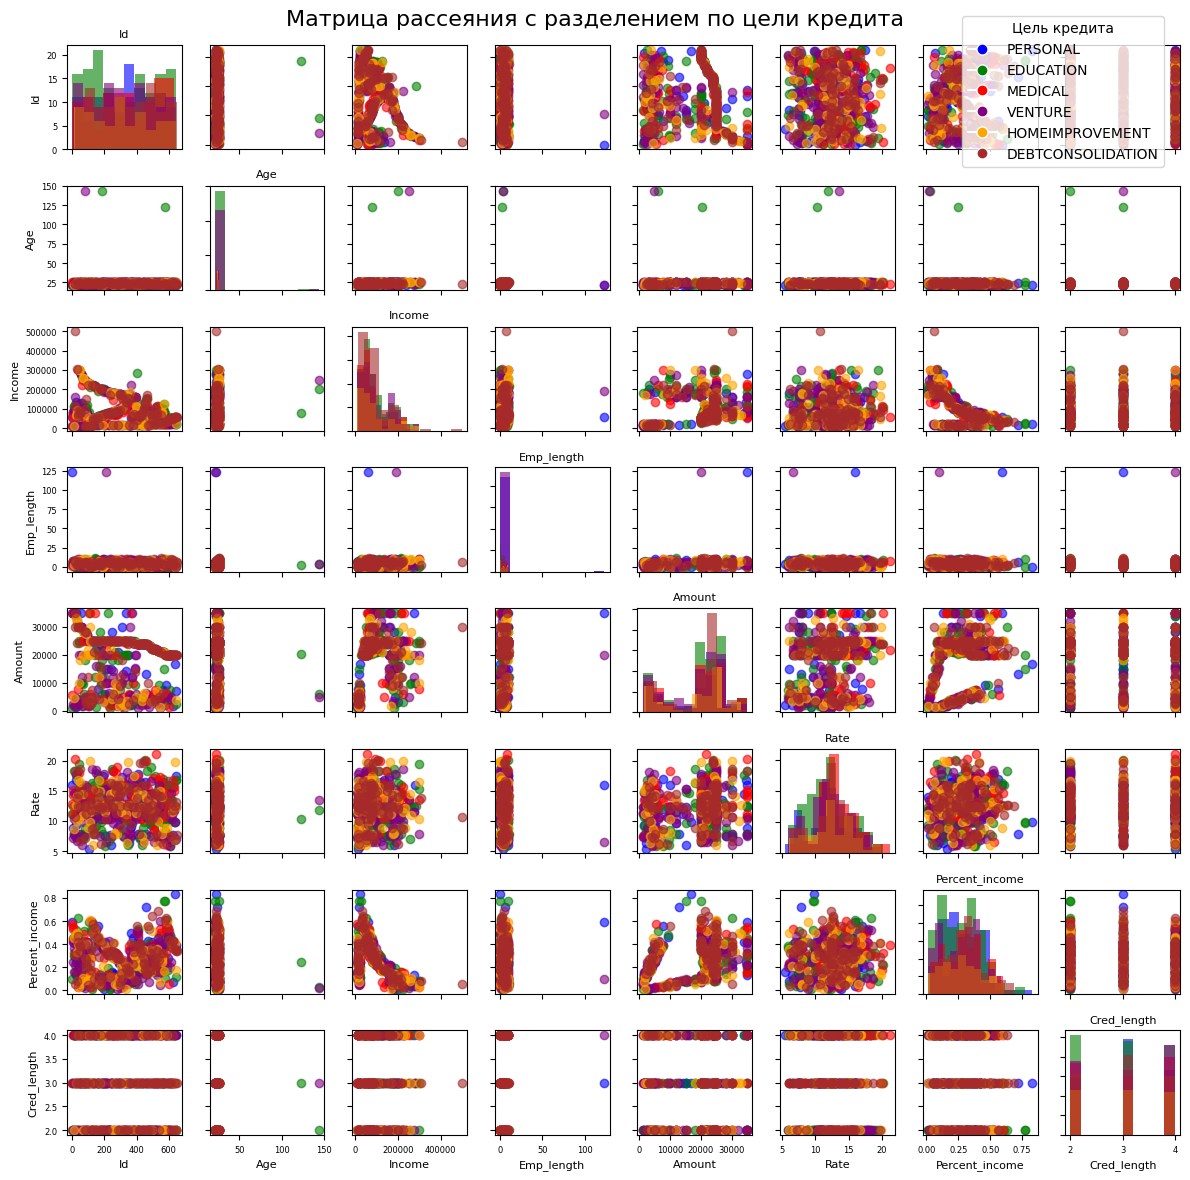

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

colors = {
    'PERSONAL': 'blue',
    'EDUCATION': 'green',
    'MEDICAL': 'red',
    'VENTURE': 'purple',
    'HOMEIMPROVEMENT': 'orange',
    'DEBTCONSOLIDATION': 'brown'
}

# Выбираем числовые колонки
numeric_cols = df.select_dtypes(include=np.number).columns
n_features = len(numeric_cols)

# Создаем матрицу графиков
fig, axes = plt.subplots(n_features, n_features, figsize=(12, 12))

# Проходим по всем комбинациям признаков
for i, col_i in enumerate(numeric_cols):
    for j, col_j in enumerate(numeric_cols):
        ax = axes[i, j]

        if i == j:
            # Диагональ - гистограмма для каждого признака
            for intent in df['Intent'].unique():
                subset = df[df['Intent'] == intent]
                ax.hist(subset[col_i], alpha=0.6, color=colors.get(intent, 'gray'), label=intent)
            ax.set_title(col_i, fontsize=8)
        else:
            # Вне диагонали - scatter plot
            for intent in df['Intent'].unique():
                subset = df[df['Intent'] == intent]
                ax.scatter(subset[col_j], subset[col_i],
                          color=colors.get(intent, 'gray'), alpha=0.6, label=intent)

        # Настройка осей
        if i < n_features - 1:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel(col_j, fontsize=8)

        if j > 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel(col_i, fontsize=8)

        ax.tick_params(labelsize=6)

# Создаем общую легенду
handles, labels = [], []
for intent in df['Intent'].unique():
    handles.append(plt.Line2D([0], [0], marker='o', color='w',
                             markerfacecolor=colors.get(intent, 'gray'), markersize=8))
    labels.append(intent)

fig.legend(handles, labels, title='Цель кредита',
           loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.suptitle('Матрица рассеяния с разделением по цели кредита', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


#### Анализ графика: Зависимость дохода от возраста по цели кредита

График отображает распределение заявителей по возрасту и доходу, с цветовой дифференциацией по цели кредита (`Intent`).

---

##### Общие наблюдения

+ Кредит по медицине востребован во всех возрастах с маленьким доходом
+ Кредит по образованию востребован у молодых людей и людей со средним возрастом с разным доходом
+ Кредит по бизнесу востребован во всех возрастах на с разным доходом
+ Кредит на ипотеку встречается чаще у людей со средним возрастом и большим заработком
---




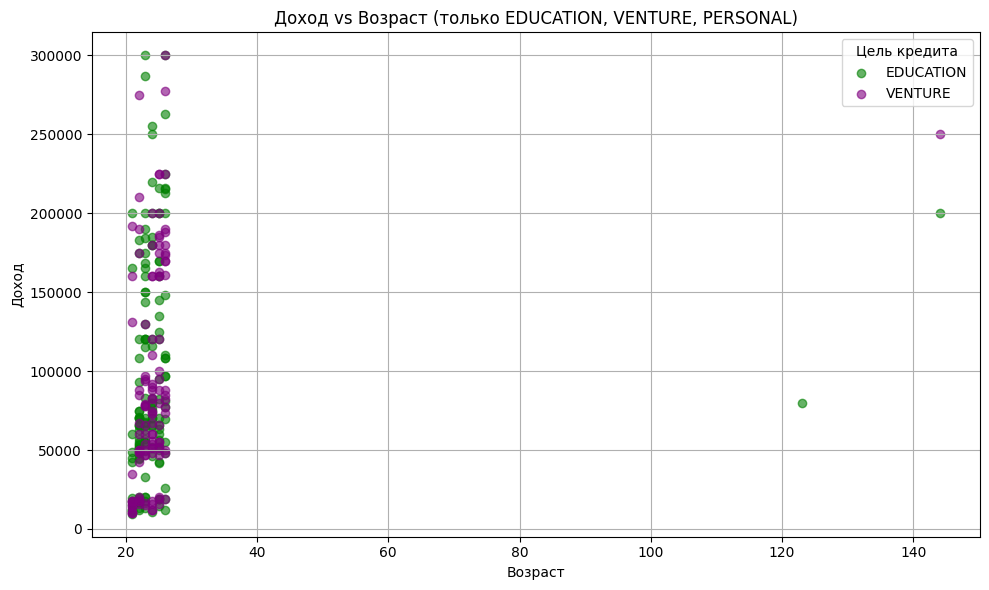

In [19]:
import matplotlib.pyplot as plt

selected_intents = ['EDUCATION', 'VENTURE']

colors = {
    'EDUCATION': 'green',
    'VENTURE': 'purple',
    'PERSONAL': 'blue'
}

plt.figure(figsize=(10, 6))

for intent in selected_intents:
    subset = df[df['Intent'] == intent]
    plt.scatter(subset['Age'], subset['Income'],
                label=intent,
                color=colors[intent],
                alpha=0.6)

plt.title('Доход vs Возраст (только EDUCATION, VENTURE, PERSONAL)')
plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.legend(title='Цель кредита')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Анализ графика: Зависимость дохода от возраста по цели кредита: образование и бизнес

График отображает распределение заявителей по возрасту и доходу, с цветовой дифференциацией по цели кредита по категориям образования и бизнеса.

---

##### Общие наблюдения
+ Люди с большим возрастом берут кредиты с большей суммой для бизнеса.
+ Молодые люди берут кредит на большие суммы с целью образования.

---

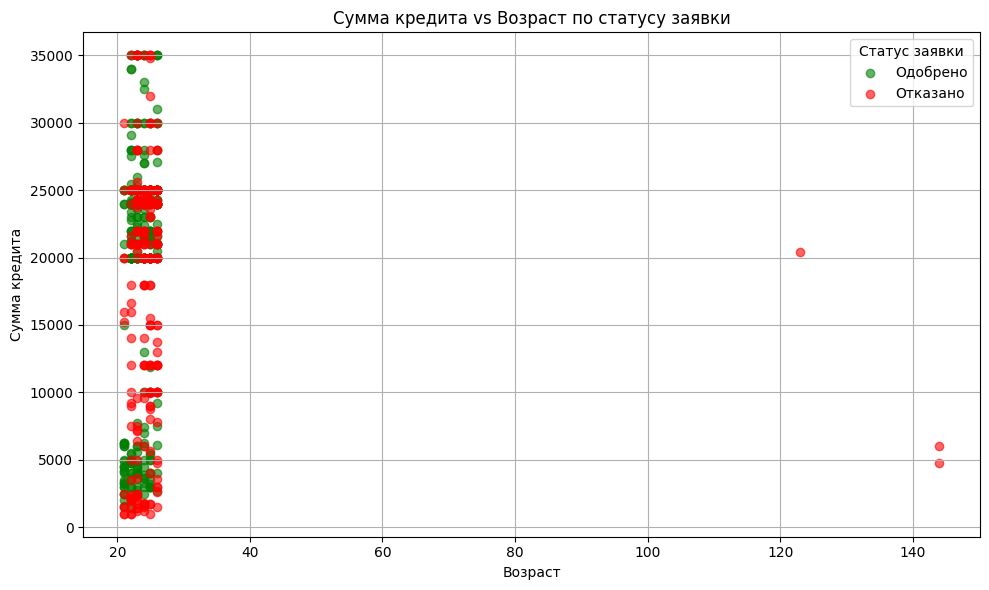

In [20]:
plt.figure(figsize=(10, 6))
categories = df['Status'].unique()
colors = ['green', 'red']  # 1 — одобрено, 0 — отказ

for i, category in enumerate(categories):
    subset = df[df['Status'] == category]
    label = 'Одобрено' if category == 1 else 'Отказано'
    plt.scatter(subset['Age'], subset['Amount'],
                label=label,
                color=colors[i % len(colors)],
                alpha=0.6)

plt.title('Сумма кредита vs Возраст по статусу заявки')
plt.xlabel('Возраст')
plt.ylabel('Сумма кредита')
plt.legend(title='Статус заявки')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Анализ графика: Зависимость суммы кредита от возраста по статусу заявки: одобрено или отказ

График отображает распределение заявителей по возрасту и сумме кредита, с цветовой дифференциацией по статусу заявки по категориям одобрено и отказ

---

##### Общие наблюдения
+ Молодым людям чаще одобряют кредиты на маленькие суммы.
+ Кредиты на средние суммы чаще отказывают, но их реже берут, если наблюдать за распределением точек на графике.
+ Людям среднего возраста одобряют и отказывают в равной степени.


---

### 7. Построить гистограммы по всем числовым признакам

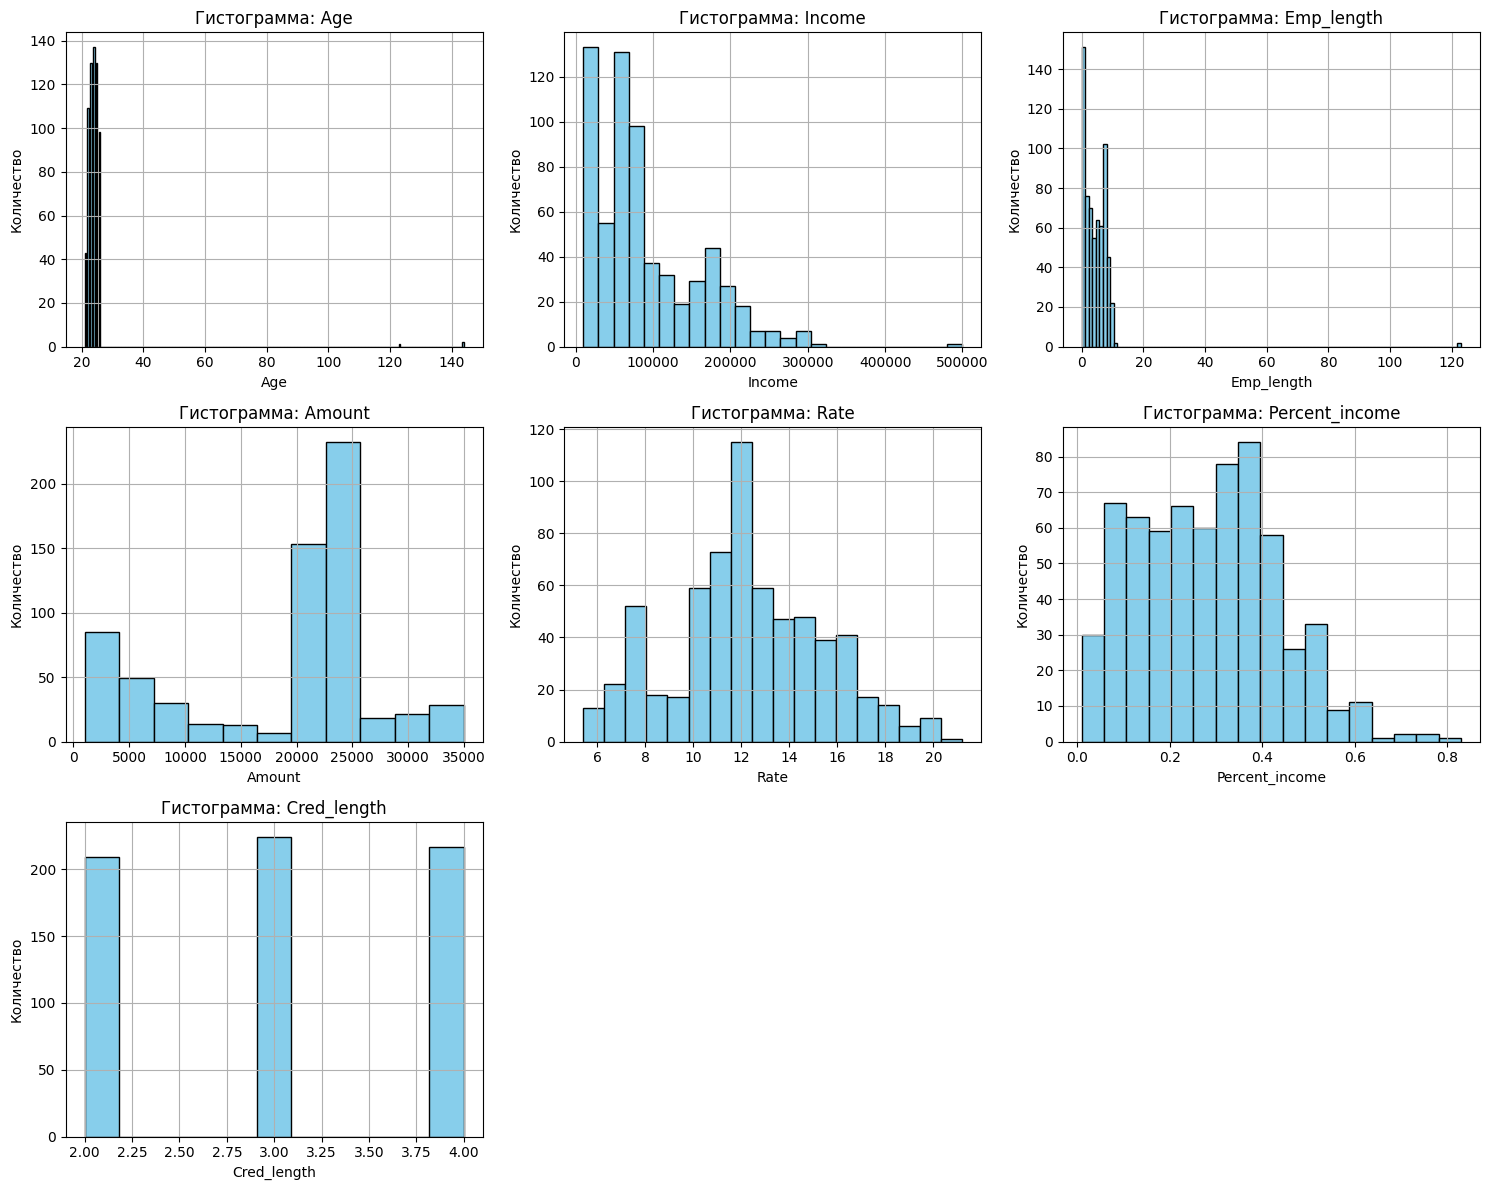

In [21]:
numeric_cols = ['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income', 'Cred_length']
import matplotlib.pyplot as plt

# Размер сетки графиков
plt.figure(figsize=(15, 12))

# Перебираем каждый числовой признак
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)  # создаём сетку 3x3
    plt.hist(df[col], bins='auto', color='skyblue', edgecolor='black')
    plt.title(f'Гистограмма: {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.grid(True)

plt.tight_layout()
plt.show()


#### Анализ графика: гистограммы по всем числовым признакам

Количество столбцов (bins) было рассчитано с помощью алгоритма Фридмана–Дьякониса.
Он автоматически рассчитывает ширину столбца (bin_width) на основе:
+ разброса данных (насколько они растянуты)
+ размера выборки (сколько строк в таблице)

**bin_width = 2 × IQR / n^(1/3)**

**IQR** - межквартильный размах: разница между 75-м и 25-м процентилем

**n** - количество строк

**bins = (max - min) / bin_width**

---

##### Общие наблюдения
**Возраст**
+ большая часть кредитов приходится на средний возраст, меньшая на молодых

**Доход**
+ Люди с меньшим доходом чаще берут кредиты

**Стаж работы**
+ Люди с маленьким стажем работы чаще берут кредит

**Сумма кредита**
+ Чаще встречается сумма кредита выше среднего значения

**Кредитная ставка**
+ Самая популярная кредитная ставка - 12%

**Сумма кредита в процентах от дохода**
+ Процент, который люди от своего дохода отдают на погашение кредитов, чаще маленький или средний

**Длина кредитной истории**
+ Во всех ситуациях одинаково популярны разные длины



---

array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Emp_length'}>,
        <Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'Rate'}>],
       [<Axes: title={'center': 'Percent_income'}>,
        <Axes: title={'center': 'Cred_length'}>, <Axes: >]], dtype=object)

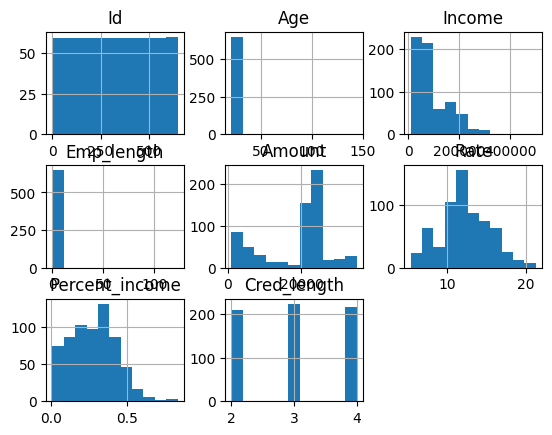

In [22]:
df.hist(bins=11)



### 8. Корреляция и ковариация. Тепловая карта.

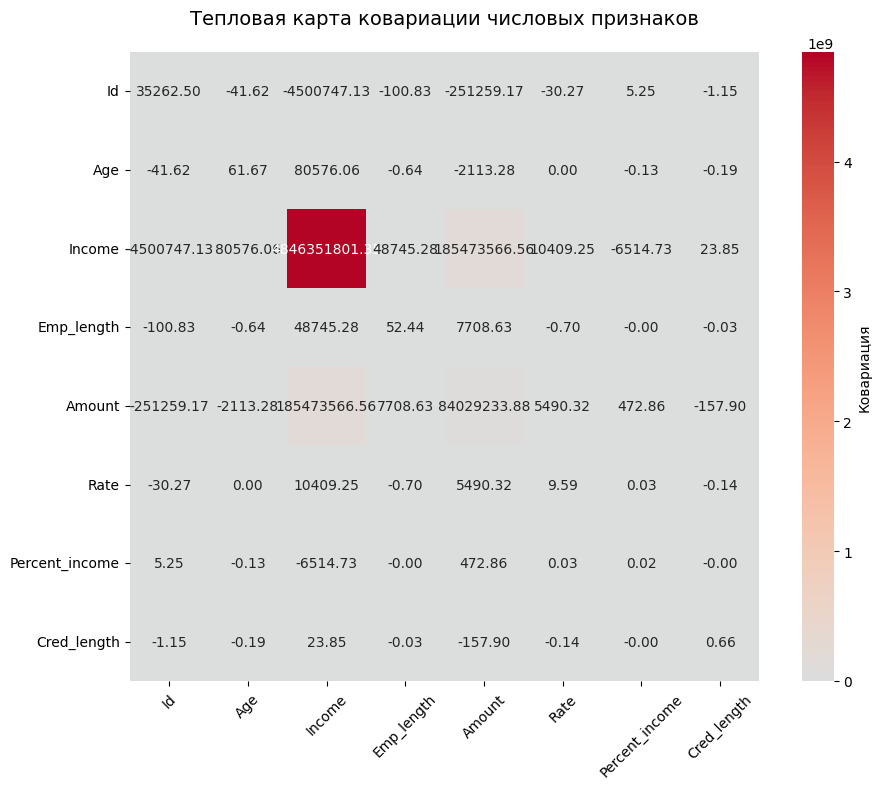

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ковариация
cov_matrix = df[numeric_cols].cov()

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix,
            annot=True,           # Показать значения в ячейках
            cmap='coolwarm',      # Цветовая схема
            center=0,             # Центр цветовой шкалы
            square=True,          # Квадратные ячейки
            fmt='.2f',            # Формат чисел
            cbar_kws={'label': 'Ковариация'})

plt.title('Тепловая карта ковариации числовых признаков', fontsize=14, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

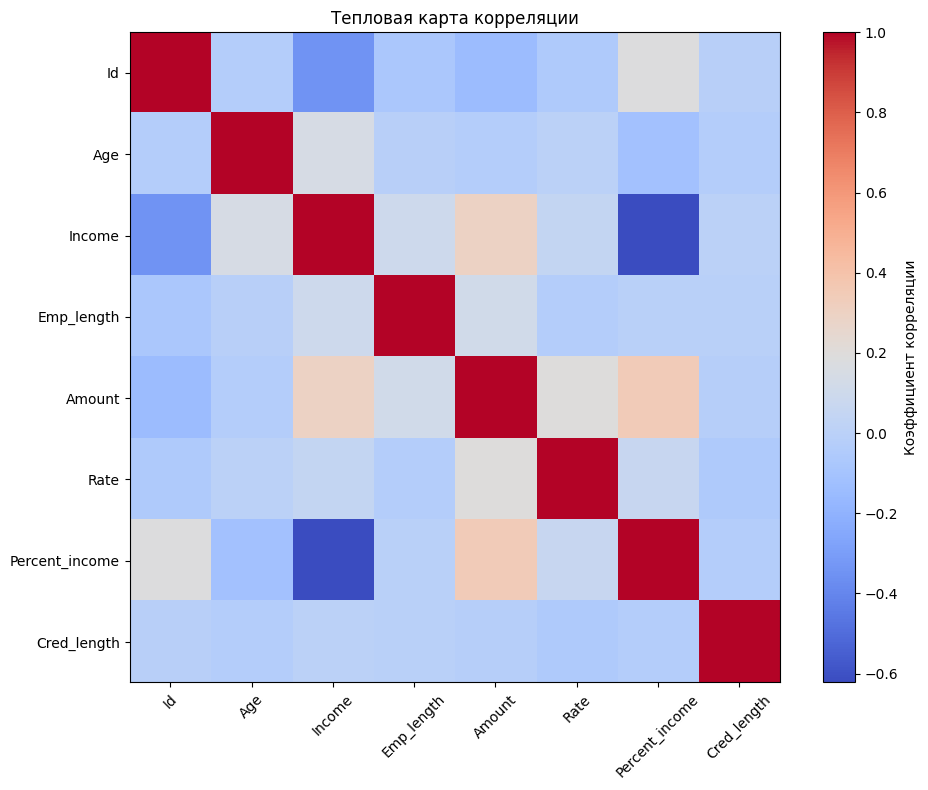

In [36]:
# Корреляция
corr_matrix = df[numeric_cols].corr()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Коэффициент корреляции')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Тепловая карта корреляции')
plt.tight_layout()
plt.show()


#### Анализ графика: тепловая карта корреляции

График отображает распределение корреаляции в зависимости от пересечения двух признаков

---

##### Общие наблюдения

+ Близкая к единице корреляция наблюдается у нескольких признаков: доход и сумма кредита, процентная ставка и сумма кредита
+ Чуть дальше, чем предыдущие признаки - доход и процентная ставка
+ Близки к минус единице сочетание признаков: доход и сумма кредита в проценте от дохода


---

### 9. Столбчатая диаграмма. Количество клиентов по статусу домовладения (Home) и дефолту (Default).

/tmp/ipython-input-1225856255.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Home', 'Default']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

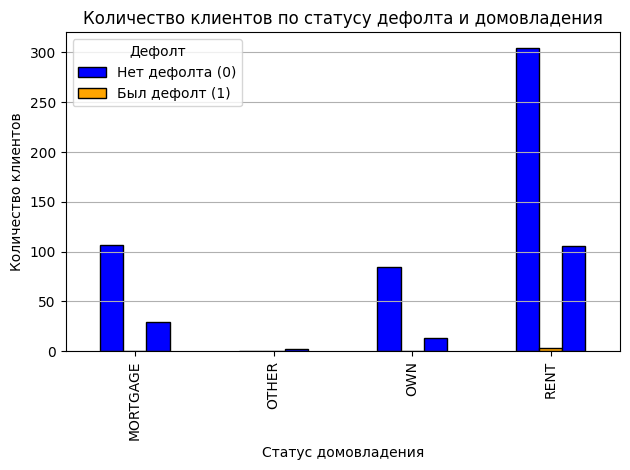

In [24]:
# Группировка по Home и Default
grouped = df.groupby(['Home', 'Default']).size().unstack(fill_value=0)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

grouped.plot(kind='bar', stacked=False, color=['blue', 'orange'], edgecolor='black')

plt.title('Количество клиентов по статусу дефолта и домовладения')
plt.xlabel('Статус домовладения')
plt.ylabel('Количество клиентов')
plt.legend(title='Дефолт', labels=['Нет дефолта (0)', 'Был дефолт (1)'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Анализ графика: ступенчатая диаграмма

График отображает несколько категорий домовладения по количеству дефолтов

---

##### Общие наблюдения

+ Дефолт происходил у людей с арендой в других категориях дефолт не наблюдается.


---

### 10. График со сводной таблицей, где отображается средняя сумма кредита по цели кредита, используя только маркеры

/tmp/ipython-input-4287201348.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='Amount', index='Intent', aggfunc='mean')


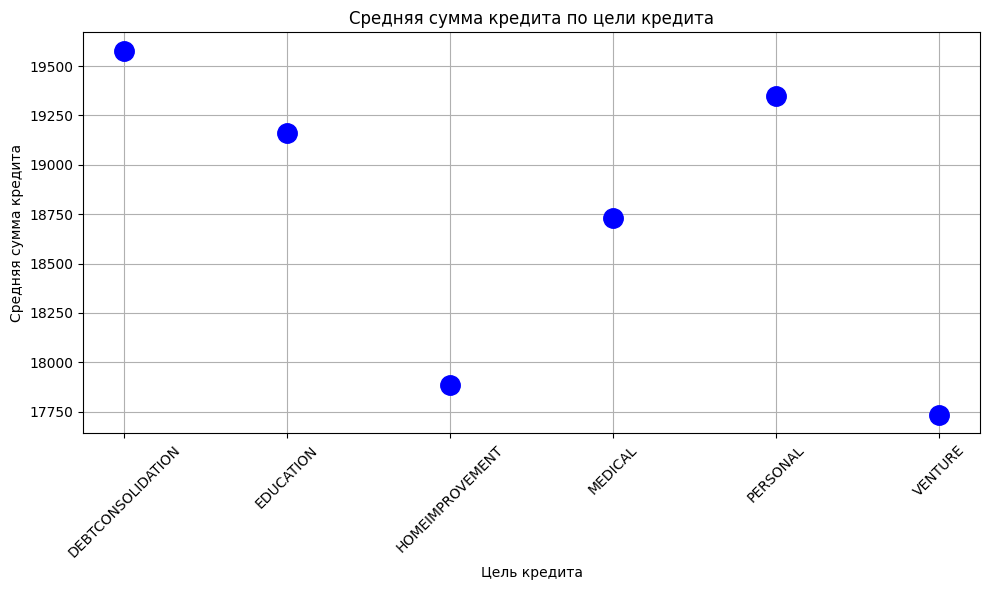

In [25]:
import pandas as pd

pivot = df.pivot_table(values='Amount', index='Intent', aggfunc='mean')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(pivot.index, pivot['Amount'],
         linestyle='None',
         marker='o',
         color='blue',
         markersize=14)
plt.title('Средняя сумма кредита по цели кредита')
plt.xlabel('Цель кредита')
plt.ylabel('Средняя сумма кредита')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Анализ графика: график со сводной таблицей

График отображает среднюю сумму кредита по цели кредита

---

##### Общие наблюдения

+ Наибольшая сумма кредита встречается у людей, которые объединяют кредиты
+ Следующим идет кредит для личных целей
+ На третьем месте кредит для образования
+ Чуть меньше по сумме кредит на медицину
+ Самые низкие значения - кредит для жилья и бизнес


---

### 11. Круговая диаграмма, которая отображает процент по типу домовладения и дефолт отсутствует

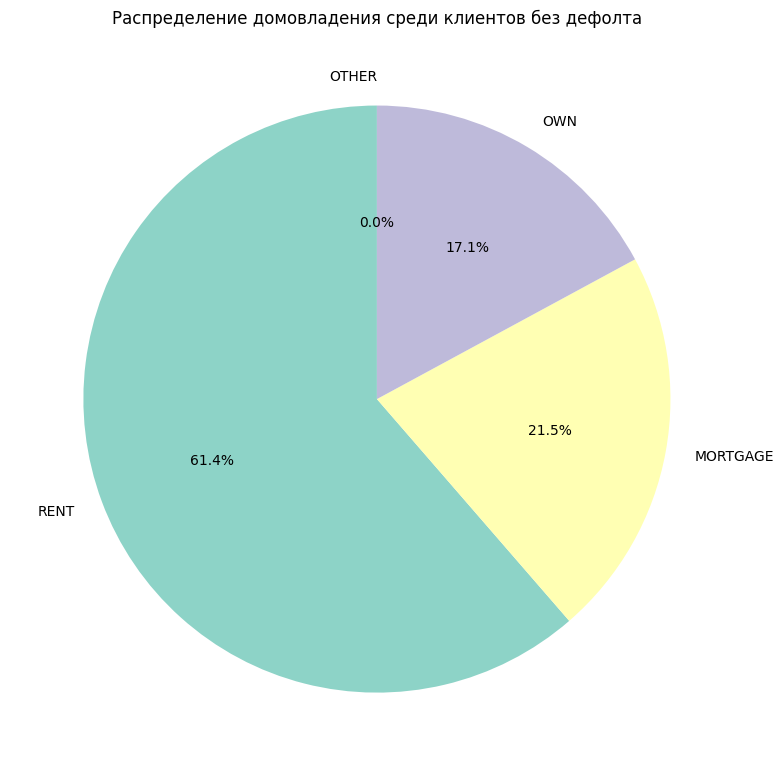

In [27]:
filtered_df = df[df['Default'] == 'N']
home_counts = filtered_df['Home'].value_counts()
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(home_counts,
        labels=home_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors)

plt.title('Распределение домовладения среди клиентов без дефолта')
plt.tight_layout()
plt.show()

#### Анализ графика: круговая диаграмма

График отображает процент людей с разным домовладением по отсутсвию дефолта

---

##### Общие наблюдения

+ Больше всего отсутсвует дефолт у людей с арендой
+ Меньше всего людей из категории собственников

---

###  12. График типа hexagonal binning plot

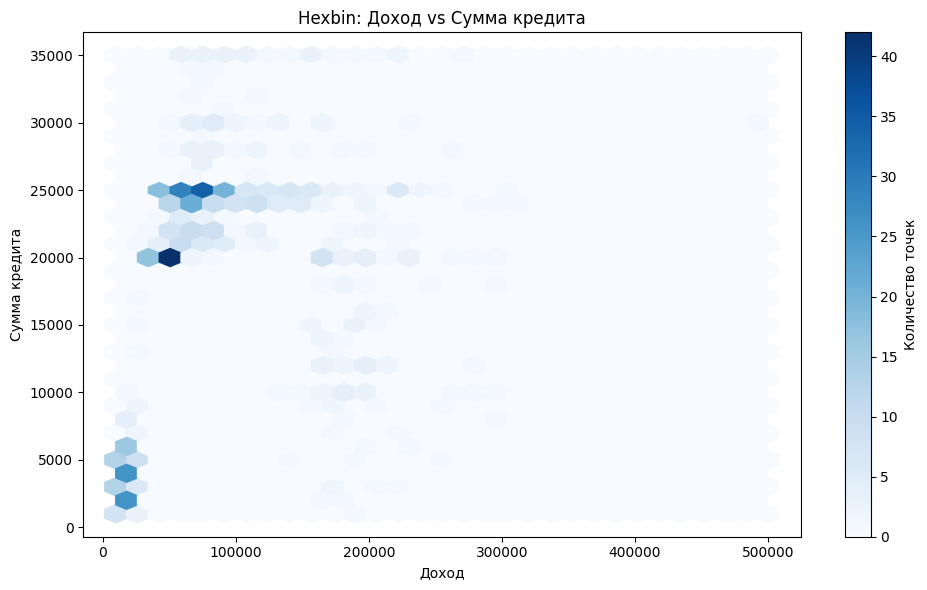

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hexbin(df['Income'], df['Amount'], gridsize=30, cmap='Blues')
plt.colorbar(label='Количество точек')
plt.xlabel('Доход')
plt.ylabel('Сумма кредита')
plt.title('Hexbin: Доход vs Сумма кредита')
plt.tight_layout()
plt.show()


#### Анализ графика: hexagonal binning plot

График отображает шестигранники и показывает, сколько точек попало в каждый.

---

##### Общие наблюдения

+ Наибольшее скопление точек у средней и чуть выше средней суммы кредита с наименьшим доходом
+ Скопление точек приходится также на маленький доход и маленькие суммы кредита.

---

### 13. График типа boxplot

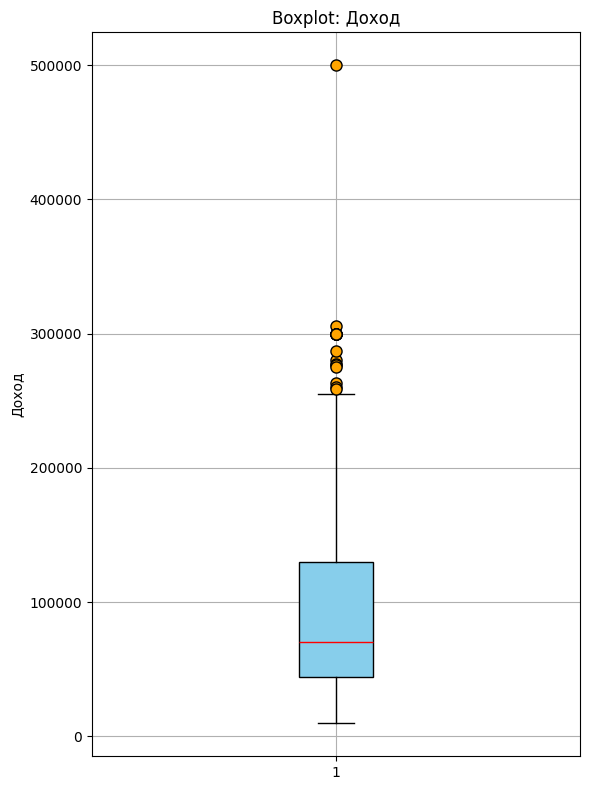

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 8))
plt.boxplot(df['Income'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', markerfacecolor='orange', markersize=8))

plt.title('Boxplot: Доход')
plt.ylabel('Доход')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Анализ графика: boxplot

График отображает прямоугольник, на котором видно медиану, квартильный размах, "усы" и выбросы

---

##### Общие наблюдения

+ Красная линия (медиана) — около 60,000 ₽

+ Коробка — от 40,000 до 120,000 ₽ → это основной диапазон доходов

+ Усы — от 20,000 до 550,000 ₽ → расширенный диапазон

+ Выбросы — точки выше 250,000 ₽ → высокодоходные клиенты, которых мало

+ Распределение асимметричное (с длинным хвостом вверх)

+ Есть значительные выбросы, которые могут повлиять на среднее значение

---

<Figure size 800x600 with 0 Axes>

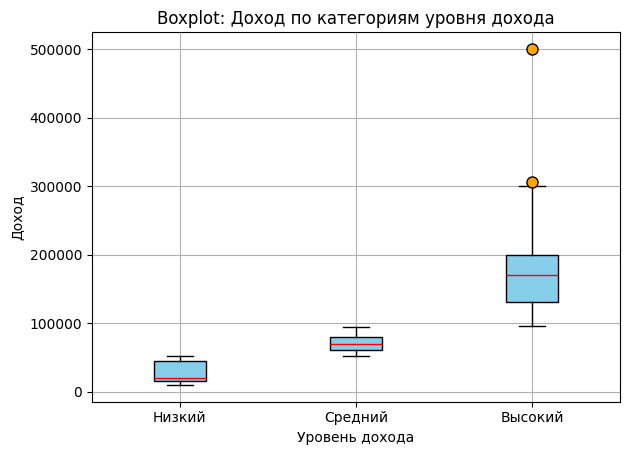

In [30]:
import pandas as pd

df['Income_level'] = pd.qcut(df['Income'], q=3, labels=['Низкий', 'Средний', 'Высокий'])
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df.boxplot(column='Income', by='Income_level',
           patch_artist=True,
           boxprops=dict(facecolor='skyblue', color='black'),
           medianprops=dict(color='red'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='orange', markersize=8))

plt.title('Boxplot: Доход по категориям уровня дохода')
plt.suptitle('')
plt.xlabel('Уровень дохода')
plt.ylabel('Доход')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Анализ графика: boxplot

График отображает несколько категорий дохдов и их уровень разброса значений

---

##### Общие наблюдения

+ С увеличением дохода медиана на графике становится выше
+ Разброс увеличивается с увеличением дохода.
+ В группе "Высокий" может быть больше выбросов — это клиенты с очень высоким доходом

---

<Axes: title={'center': 'Rate'}, xlabel='Rate_level'>

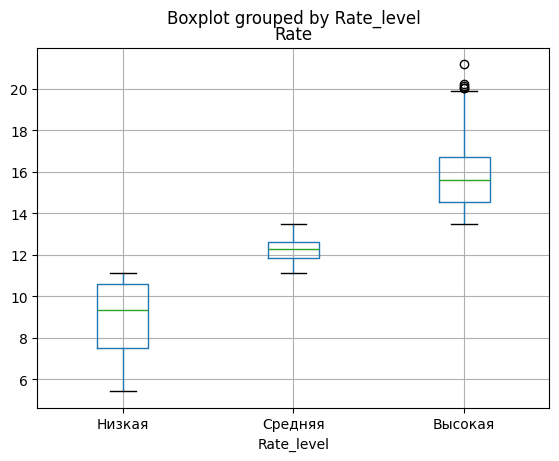

In [31]:
df['Rate_level'] = pd.qcut(df['Rate'], q=3, labels=['Низкая', 'Средняя', 'Высокая'])
df.boxplot(column='Rate', by='Rate_level')


#### Анализ графика: boxplot

График отображает несколько категорий процентной ставки и их уровень разброса значений

---

##### Общие наблюдения

+ С увеличением процентной ставки медиана на графике становится выше
+ Разброс приходит в норму при средней ставке
+ Выбросы в категории "Высокая" могут указывать на невыгодные или рискованные кредиты

---

<Figure size 800x600 with 0 Axes>

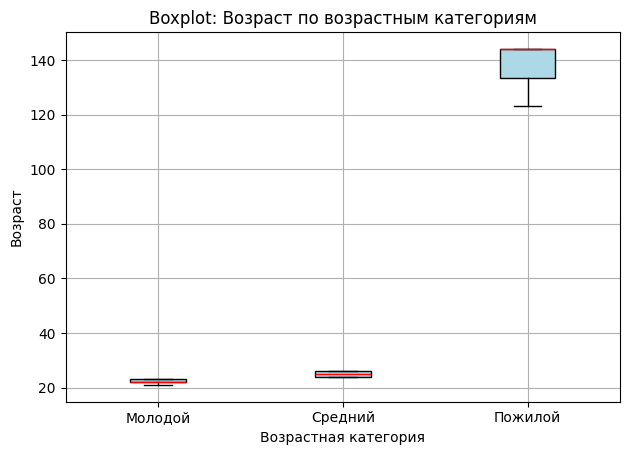

In [32]:
df['Age_group'] = pd.cut(df['Age'],
                         bins=[20, 23, 30, df['Age'].max()],
                         labels=['Молодой', 'Средний', 'Пожилой'])
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df.boxplot(column='Age', by='Age_group',
           patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           medianprops=dict(color='red'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='orange', markersize=8))

plt.title('Boxplot: Возраст по возрастным категориям')
plt.suptitle('')
plt.xlabel('Возрастная категория')
plt.ylabel('Возраст')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Анализ графика: boxplot

График отображает несколько категорий по возрастам и их уровень разброса значений

---

##### Общие наблюдения

+ Медиана и разброс возраста увеличиваются от молодой к пожилой группе

+ Выбросы в пожилой категории могут быть ошибками (например, 144 года)

---